In [1]:
# Load all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the medical claims data
benf_df = pd.read_csv('data\Train_Beneficiarydata-1542865627584.csv')
inpatient_df = pd.read_csv('data\Train_Inpatientdata-1542865627584.csv')
outpatient_df = pd.read_csv('data\Train_Outpatientdata-1542865627584.csv')
labels_df = pd.read_csv('data\Train-1542865627584.csv')

##### Lets first start with the labels first to get a general sense of the type of problem we are dealing with

In [7]:
labels_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [12]:
print(labels_df.shape)

(5410, 2)


##### We have 5410 rows and 2 columns in the labels data frame. Now lets plot the counts of the potential fraud cases

<Axes: >

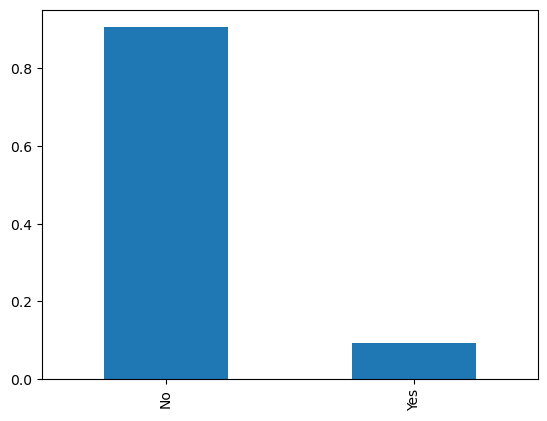

In [14]:
labels_df['PotentialFraud'].value_counts(normalize =True).plot(kind='bar')

It is obvious that there are far more number of No than Yes in the data. So this uneuqal labels can make this a hard problem to solve. As we should not try to maximixe accuracy, but rather the sensitivity (i.e., true positive rate)

#### First lets explore each data frame in some detail starting with inpatient_df

In [4]:
# Look at the column names and data types of the data frame
print(benf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [5]:
# Now lets look at the first few rows of the data frame
print(benf_df.head())

      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2 

##### It looks like the Gender is binary as expected with 2 values. To confirm we can just look at the number of unique elements and convert it to a boolean variable.

<Axes: >

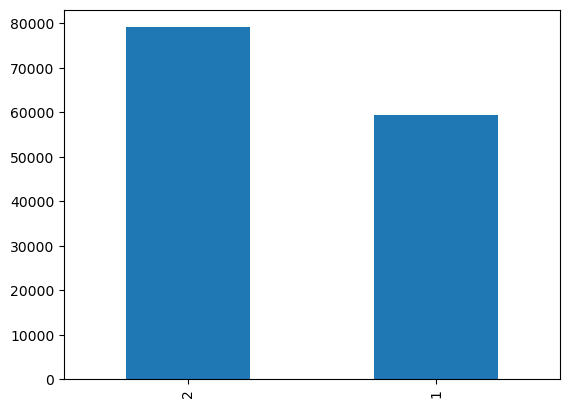

In [6]:
# Plot  counts for gender. Probably 1 indicates Male and 2 is Female
benf_df['Gender'].value_counts().plot(kind='bar')

In [7]:
# lets make this category boolean, so that 1 indicates Female and 2 as male
benf_df['Gender'] = benf_df['Gender'].map({1: 0, 2: 1})

<Axes: >

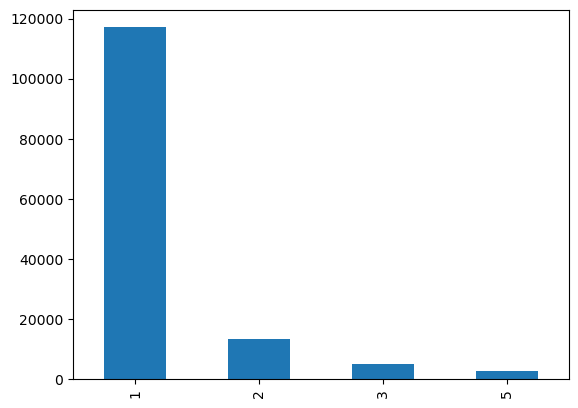

In [8]:
# Now lets also plot the boolean values for race
benf_df['Race'].value_counts().plot(kind='bar')

##### It looks like the race is not evenly distributed in the dataset, with most values beloning to 1 primary class. So probably we can encode this as binary with 0 being white  and 1 being other races.

In [9]:
# Lets make this category boolean, so that 0 indicates White and 1 as Non-White
benf_df['Race'] = benf_df['Race'].map(lambda x: 'White' if x ==1 else 'Non-White').map({'White': 0, 'Non-White': 1})

<Axes: >

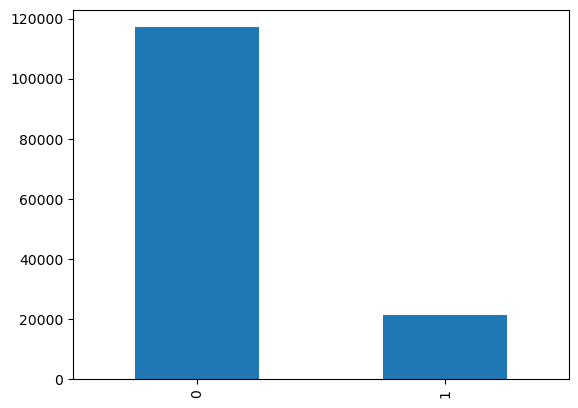

In [10]:
# Now lets also plot the boolean values for race
benf_df['Race'].value_counts().plot(kind='bar')

<Axes: >

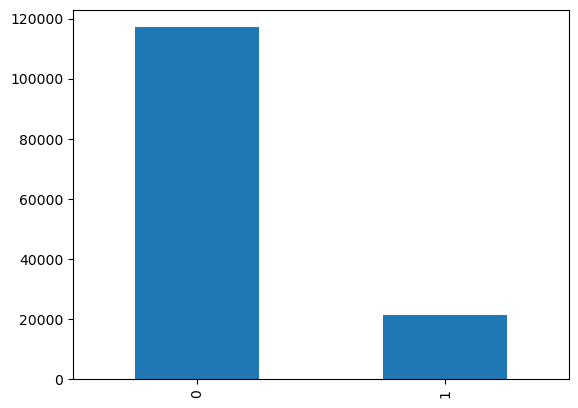

In [11]:
benf_df['Race'].value_counts().plot(kind='bar')

In [12]:
# Convert the date of birth and date of death to datetime format
benf_df['DOB'] = pd.to_datetime(benf_df['DOB'], format='%Y-%m-%d')
benf_df['DOD'] = pd.to_datetime(benf_df['DOB'], format='%Y-%m-%d')

In [13]:
# Since state and county are categorical values. lets convert them accordingly
benf_df['State'] = benf_df['State'].astype('category')
benf_df['County'] = benf_df['County'].astype('category')

<Axes: >

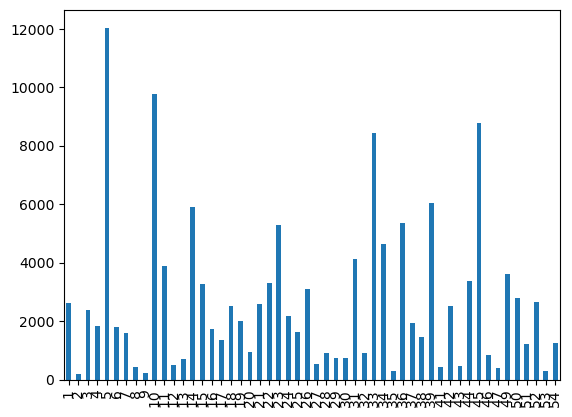

In [14]:
# Plot the distribution across states
benf_df['State'].value_counts().sort_index().plot(kind='bar')

<Axes: >

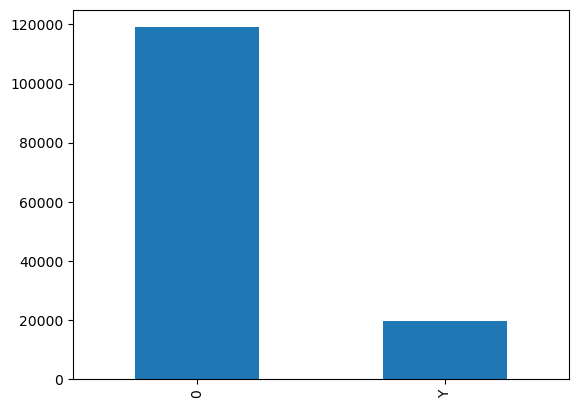

In [15]:
# Lets plot the values of Renal Disease indicator.
benf_df['RenalDiseaseIndicator'].value_counts().plot(kind='bar')

In [16]:
# It is apparent that we need to first convert it to Boolean
benf_df['RenalDiseaseIndicator'] = benf_df['RenalDiseaseIndicator'].map({'0': 0, "Y": 1})

<Axes: >

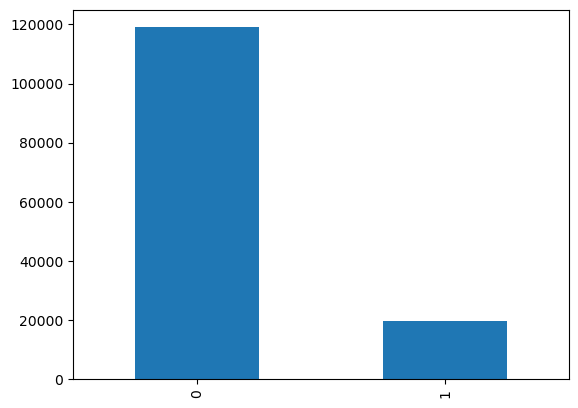

In [19]:
benf_df['RenalDiseaseIndicator'].value_counts().plot(kind='bar')

In [ ]:
##### Now lets examine the no of months of Part A and Part B coverage

<Axes: >

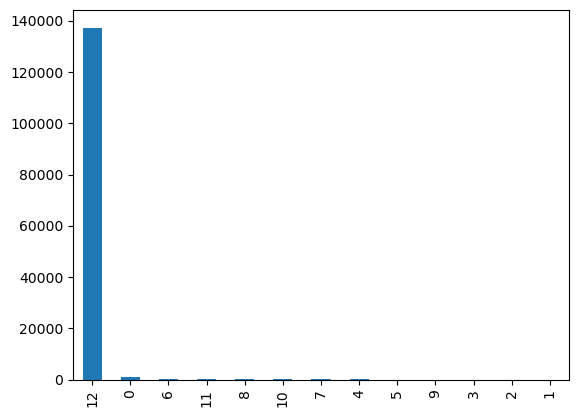

In [20]:
benf_df['NoOfMonths_PartACov'].value_counts().plot(kind='bar')

<Axes: >

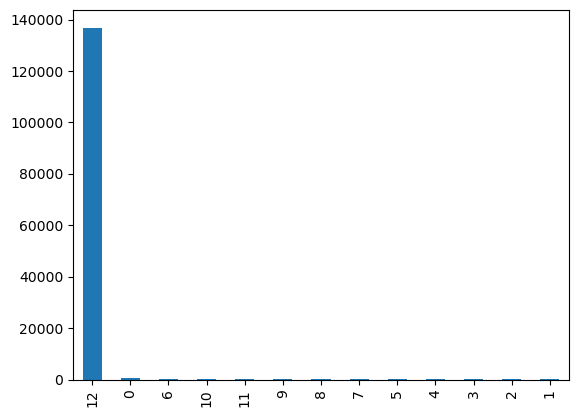

In [21]:
benf_df['NoOfMonths_PartBCov'].value_counts().plot(kind='bar')

In [15]:
benf_df.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


<Axes: >

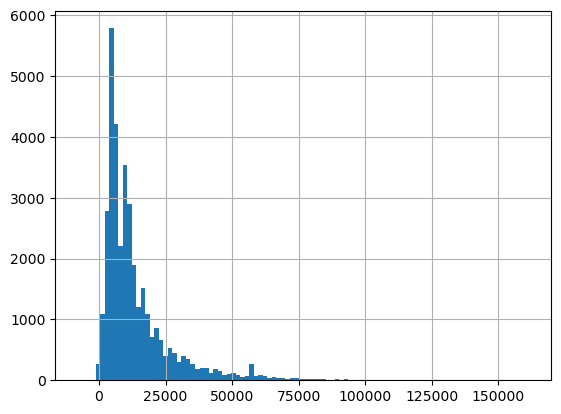

In [28]:
benf_df.loc[benf_df['IPAnnualReimbursementAmt']!=0, 'IPAnnualReimbursementAmt'].hist(bins = 100)

In [31]:
benf_df['State'] = benf_df['State'].astype(str)

In [32]:
benf_df['State'].dtype

dtype('O')

<Axes: xlabel='State', ylabel='count'>

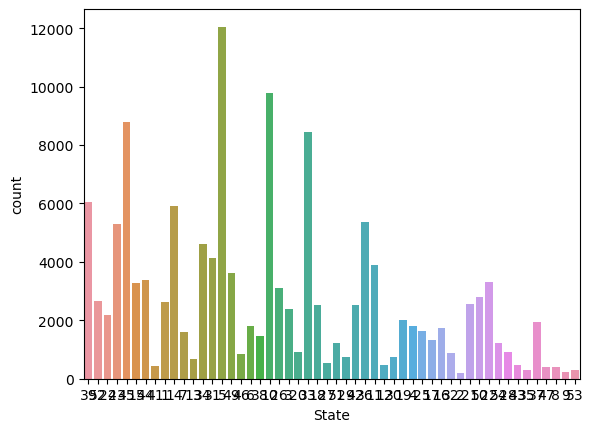

In [40]:
sns.countplot(x = benf_df['State'])

In [35]:
benf_df['State'].head()

0    39
1    39
2    52
3    39
4    24
Name: State, dtype: object

C:\Users\prady\AppData\Local\Temp\ipykernel_16968\3554923919.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(benf_df.loc[benf_df['IPAnnualReimbursementAmt']!=0, 'IPAnnualReimbursementAmt'], kde =False)


<Axes: xlabel='IPAnnualReimbursementAmt'>

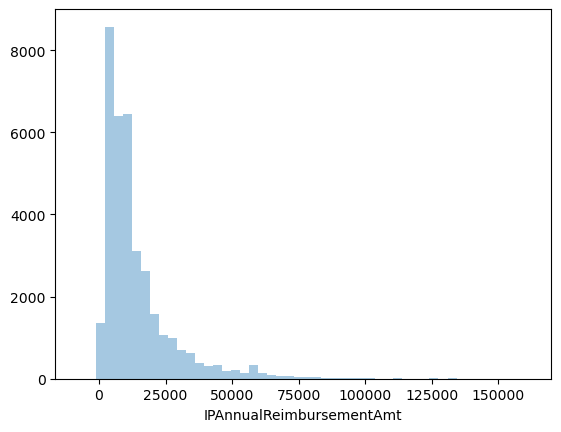

In [30]:
import seaborn as sns
sns.distplot(benf_df.loc[benf_df['IPAnnualReimbursementAmt']!=0, 'IPAnnualReimbursementAmt'], kde =False)

In [33]:
benf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  object
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [21]:
benf_df['State'].head()

0    39
1    39
2    52
3    39
4    24
Name: State, dtype: int64

In [6]:
# Explore the data frames
benf_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

## 1. Buisiness problem

## 2. Exploratory data analysis (EDA)

## 3. Data cleaning and Preperation

## 4. Modeling

## 5. Evaluation

## 6. Deployment